# Checking the output of the travel-time grids

## Plot the velocity grid

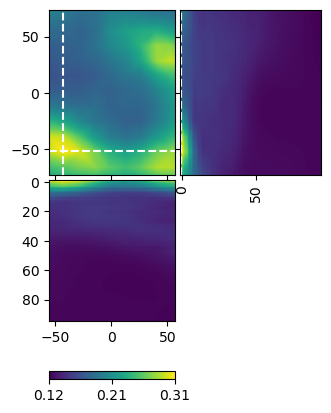

In [79]:
from nllgrid import NLLGrid

# Define the output filename of Vel2Grid or Vel2Grid3D 
wave = 'P' # 'S'
grdfile = f"/Users/lpapin/Downloads/layer.{wave}.mod"
grd = NLLGrid(grdfile)

# Plot with changing the max of the colobar
grd.plot(slice_index='max')

In [80]:
# Details of the grid
print(grd)

basename: /Users/lpapin/Downloads/layer.P.mod
nx: 111 ny: 146 nz: 95
x_orig: -55.0 y_orig: -72.5 z_orig: -1.0
dx: 1.0 dy: 1.0 dz: 1.0
grid_type: SLOW_LEN
float_type: FLOAT
transform: TRANSFORM  LAMBERT RefEllipsoid WGS-84  LatOrig 48.650000  LongOrig -123.750000  FirstStdParal 48.000000  SecondStdParal 49.300000  RotCW 0.000000


## Check the projection and coordinates of the stations

The log data is just a copy/paste of what comes out of the Grid2Time command. It helps checking the velocities but mostly how the coordinates went from x and y in km, in lat/lon with the projection written in the runfile.

In [81]:
# Log data (paste your full log here)
log_data = '''

Calculating travel times for source: MGCB  X 5.1010  Y -2.0328  Z -0.2360 (lat/lon/depth  48.631697  -123.680791  -0.236000) ...
Source:  Velocity: 3.120000 km/sec  GridLoc: ix=60.101025 iy=70.467148 iz=0.764000
Finished calculation, time grid output files: ./time/layer.S.MGCB.*

Calculating travel times for source: LZB  X -5.4569  Y -4.2011  Z -0.7940 (lat/lon/depth  48.612195  -123.824009  -0.794000) ...
Source:  Velocity: 3.155000 km/sec  GridLoc: ix=49.543064 iy=68.298904 iz=0.206000
Finished calculation, time grid output files: ./time/layer.S.LZB.*

Calculating travel times for source: NLLB  X -17.3541  Y 64.2142  Z -0.1990 (lat/lon/depth  49.227205  -123.988259  -0.199000) ...
Source:  Velocity: 3.060000 km/sec  GridLoc: ix=37.645885 iy=136.714172 iz=0.801000
Finished calculation, time grid output files: ./time/layer.S.NLLB.*

Calculating travel times for source: PFB  X -51.9594  Y -8.1367  Z -0.4490 (lat/lon/depth  48.574669  -124.454180  -0.449000) ...
Source:  Velocity: 3.142500 km/sec  GridLoc: ix=3.040620 iy=64.363251 iz=0.551000
Finished calculation, time grid output files: ./time/layer.S.PFB.*

Calculating travel times for source: PGC  X 21.9516  Y 0.0202  Z -0.0120 (lat/lon/depth  48.649796  -123.452062  -0.012000) ...
Source:  Velocity: 3.115000 km/sec  GridLoc: ix=76.951645 iy=72.520164 iz=0.988000
Finished calculation, time grid output files: ./time/layer.S.PGC.*

Calculating travel times for source: SNB  X 42.4648  Y 14.0718  Z -0.4020 (lat/lon/depth  48.775103  -123.172211  -0.402000) ...
Source:  Velocity: 2.512500 km/sec  GridLoc: ix=97.464836 iy=86.571815 iz=0.598000
Finished calculation, time grid output files: ./time/layer.S.SNB.*

Calculating travel times for source: YOUB  X -37.5279  Y 28.0397  Z -0.7710 (lat/lon/depth  48.901027  -124.261892  -0.771000) ...
Source:  Velocity: 3.285000 km/sec  GridLoc: ix=17.472132 iy=100.539696 iz=0.229000
Finished calculation, time grid output files: ./time/layer.S.YOUB.*

Calculating travel times for source: KLNB  X 13.2167  Y 1.2498  Z 0.0000 (lat/lon/depth  48.661100  -123.570577  0.000000) ...
Source:  Velocity: 3.100000 km/sec  GridLoc: ix=68.216721 iy=73.749809 iz=1.000000
Finished calculation, time grid output files: ./time/layer.S.KLNB.*

Calculating travel times for source: SILB  X 34.5550  Y -5.2331  Z -0.0760 (lat/lon/depth  48.601984  -123.281444  -0.076000) ...
Source:  Velocity: 3.052500 km/sec  GridLoc: ix=89.554993 iy=67.266953 iz=0.924000
Finished calculation, time grid output files: ./time/layer.S.SILB.*

Calculating travel times for source: SSIB  X 26.6564  Y 11.8289  Z -0.0120 (lat/lon/depth  48.755809  -123.387446  -0.012000) ...
Source:  Velocity: 2.947500 km/sec  GridLoc: ix=81.656433 iy=84.328934 iz=0.988000
Finished calculation, time grid output files: ./time/layer.S.SSIB.*

Calculating travel times for source: TSJB  X -17.5913  Y -5.3887  Z -0.3780 (lat/lon/depth  48.601291  -123.988528  -0.378000) ...
Source:  Velocity: 3.230000 km/sec  GridLoc: ix=37.408718 iy=67.111328 iz=0.622000
Finished calculation, time grid output files: ./time/layer.S.TSJB.*

Calculating travel times for source: TWKB  X 1.2381  Y -0.5782  Z -0.1280 (lat/lon/depth  48.644799  -123.733198  -0.128000) ...
Source:  Velocity: 3.140000 km/sec  GridLoc: ix=56.238083 iy=71.921844 iz=0.872000
Finished calculation, time grid output files: ./time/layer.S.TWKB.*

'''

In [82]:
import re
import pandas as pd

# Adjusted regex pattern to extract station name and lat/lon
pattern = r"Calculating travel times for source:\s+(\w+).*?\(lat/lon/depth\s+([-\d.]+)\s+([-\d.]+)"

# Find all matches in the log data
matches = re.findall(pattern, log_data)
if matches:
    df = pd.DataFrame(matches, columns=['sta', 'lat_grid2time', 'lon_grid2time'])
    df['lat_grid2time'] = df['lat_grid2time'].astype(float)
    df['lon_grid2time'] = df['lon_grid2time'].astype(float)
    print(df)
else:
    print("No matches found.")

     sta  lat_grid2time  lon_grid2time
0   MGCB      48.631697    -123.680791
1    LZB      48.612195    -123.824009
2   NLLB      49.227205    -123.988259
3    PFB      48.574669    -124.454180
4    PGC      48.649796    -123.452062
5    SNB      48.775103    -123.172211
6   YOUB      48.901027    -124.261892
7   KLNB      48.661100    -123.570577
8   SILB      48.601984    -123.281444
9   SSIB      48.755809    -123.387446
10  TSJB      48.601291    -123.988528
11  TWKB      48.644799    -123.733198


In [83]:
# Load the stations and their original lat/lon coordinates
stas=pd.read_csv('stations.csv', usecols=[0, 1, 2, 3, 4],
                    names=['net', 'sta', 'lat_origin', 'lon_origin', 'elev'], header=0, delimiter='|')
# Matching the stations with the one used in the picker
stations_to_keep = {'SSIB', 'SILB', 'TSJB', 'TWKB', 'KLNB', 'LZB', 'PGC', 'PFB', 'MGCB', 'NLLB', 'SNB', 'YOUB'}
stas = stas[stas['sta'].isin(stations_to_keep)].reset_index(drop=True)
stas=stas.drop(columns=['elev'])
print(stas)

   net   sta  lat_origin  lon_origin
0   C8  MGCB     48.6317   -123.6808
1   CN   LZB     48.6122   -123.8240
2   CN  NLLB     49.2271   -123.9882
3   CN   PFB     48.5747   -124.4541
4   CN   PGC     48.6498   -123.4521
5   CN   SNB     48.7751   -123.1723
6   CN  YOUB     48.9010   -124.2618
7   PO  KLNB     48.6611   -123.5706
8   PO  SILB     48.6020   -123.2815
9   PO  SSIB     48.7558   -123.3875
10  PO  TSJB     48.6013   -123.9885
11  PO  TWKB     48.6448   -123.7332


In [84]:
# Merge the two DataFrames on the station
merged_df = pd.merge(stas, df, on='sta')
print(merged_df)

   net   sta  lat_origin  lon_origin  lat_grid2time  lon_grid2time
0   C8  MGCB     48.6317   -123.6808      48.631697    -123.680791
1   CN   LZB     48.6122   -123.8240      48.612195    -123.824009
2   CN  NLLB     49.2271   -123.9882      49.227205    -123.988259
3   CN   PFB     48.5747   -124.4541      48.574669    -124.454180
4   CN   PGC     48.6498   -123.4521      48.649796    -123.452062
5   CN   SNB     48.7751   -123.1723      48.775103    -123.172211
6   CN  YOUB     48.9010   -124.2618      48.901027    -124.261892
7   PO  KLNB     48.6611   -123.5706      48.661100    -123.570577
8   PO  SILB     48.6020   -123.2815      48.601984    -123.281444
9   PO  SSIB     48.7558   -123.3875      48.755809    -123.387446
10  PO  TSJB     48.6013   -123.9885      48.601291    -123.988528
11  PO  TWKB     48.6448   -123.7332      48.644799    -123.733198


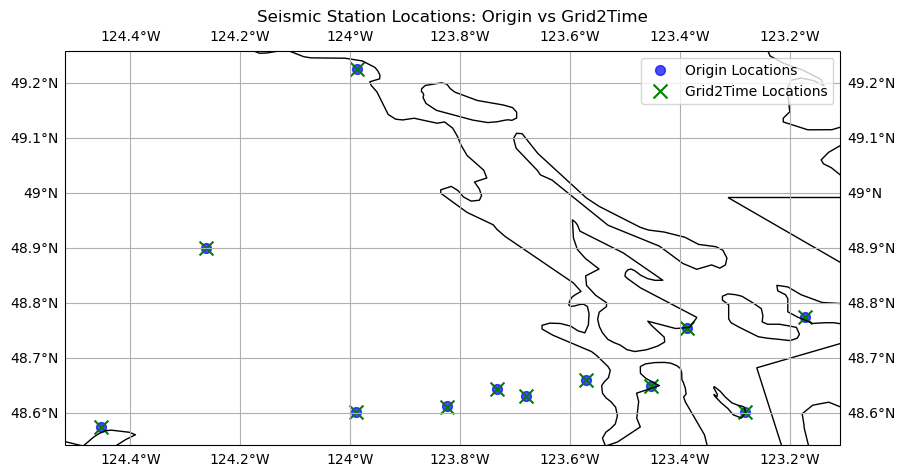

In [85]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure to compare both coordinates: original and projected
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS)
# Plot origin locations (lat_origin, lon_origin) as blue circles
ax.scatter(merged_df['lon_origin'], merged_df['lat_origin'], color='blue', label='Origin Locations', 
           s=50, marker='o', alpha=0.7)
# Plot grid2time locations (lat_grid2time, lon_grid2time) as green x's
ax.scatter(merged_df['lon_grid2time'], merged_df['lat_grid2time'], color='green', label='Grid2Time Locations', 
           s=100, marker='x')
plt.legend()
plt.title('Seismic Station Locations: Origin vs Grid2Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.gridlines(draw_labels=True)
plt.show()

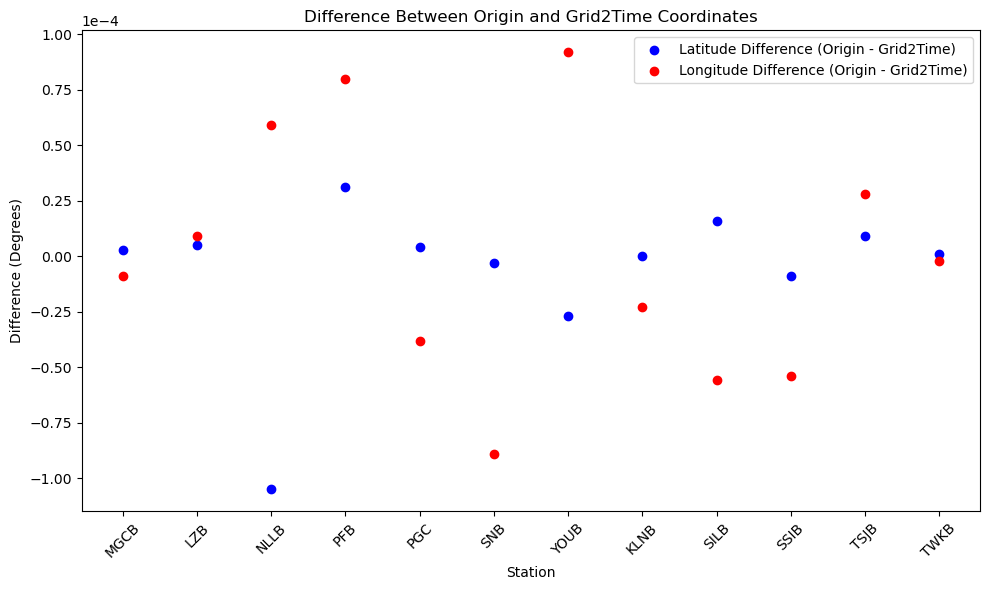

In [86]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Calculate differences for latitude and longitude
lat_diff = merged_df['lat_origin'] - merged_df['lat_grid2time']
lon_diff = merged_df['lon_origin'] - merged_df['lon_grid2time']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['sta'], lat_diff, color='blue', label='Latitude Difference (Origin - Grid2Time)')
plt.scatter(merged_df['sta'], lon_diff, color='red', label='Longitude Difference (Origin - Grid2Time)')
plt.xlabel('Station')
plt.ylabel('Difference (Degrees)')
plt.title('Difference Between Origin and Grid2Time Coordinates')
plt.legend()
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.tight_layout()
plt.show()